# Lab 1 - Spectral Analysis of Deterministic Signals

### Mikołaj Zuziak, variant 9

Synthesize a discrete-time signal by using the IDFT in matrix notation
for different values of N. Show the matrices W and K. Plot the signal
synthesized.

Input data (variant specific):
$$
\begin{equation}

\mathbf{x}_\mu = [6, 5, 4, 3, 4, 5, 0, 0, 0, 0]^\text{T}

\end{equation}$$

---

## Solution

#### Import libraries and input task specific data

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy.fft import fft, ifft

#### Input Signal

In [25]:
#This is variant specific
input_data = np.array([6, 5, 4, 3, 4, 5, 0, 0, 0, 0])
N = len(input_data)

#### Create matrices W and K

\begin{align}
\mathbf{K} =  k \cdot \mu\\
\mathbf{W} = \mathrm{e}^{+\mathrm{j}\frac{2\pi}{N} \cdot \mathbf{K}}
\end{align}

In [41]:
k = np.arange(N)
mu = np.arange(N)

K = np.outer(k, mu) #outer product of k and mu
W = np.exp(+1j * 2 * np.pi / N * K) #analysis matrix for DFT

#### Show matrices W and K

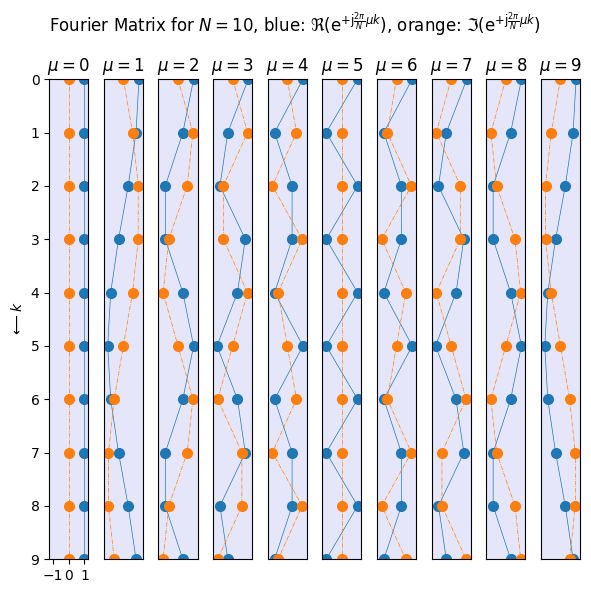

In [ ]:
#Create a figure with N subplots
fig, ax = plt.subplots(1, N)
fig.set_size_inches(6, 6)

#Set the title of the figure
fig.suptitle(
    r'Fourier Matrix for $N=$%d, blue: $\Re(\mathrm{e}^{+\mathrm{j} \frac{2\pi}{N} \mu k})$, orange: $\Im(\mathrm{e}^{+\mathrm{j} \frac{2\pi}{N} \mu k})$' % N)

#Iterate over the subplots
for tmp in range(N):
    #Extracting real and imaginary parts of the current column
    real_part = W[:, tmp].real
    imag_part = W[:, tmp].imag
    
    #Set the background color
    ax[tmp].set_facecolor('lavender')
    
    #Plotting the real and imaginary parts
    ax[tmp].plot(real_part, k, 'C0o-', ms=7, lw=0.5)
    ax[tmp].plot(imag_part, k, 'C1o-.', ms=7, lw=0.5)
    
    #Set the limits of the current subplot
    ax[tmp].set_ylim(N-1, 0)
    ax[tmp].set_xlim(-5/4, +5/4)
    
    #Adjust the ticks and labels of the current subplot
    if tmp == 0:
        ax[tmp].set_yticks(np.arange(0, N))
        ax[tmp].set_xticks(np.arange(-1, 1+1, 1))
        ax[tmp].set_ylabel(r'$\longleftarrow k$')
    else:
        ax[tmp].set_yticks([], minor=False)
        ax[tmp].set_xticks([], minor=False)
    
    ax[tmp].set_title(r'$\mu=$%d' % tmp)

fig.tight_layout()

#### Synthesizing the Signal using IDFT

\begin{align}
\text{IDFT:   } & \mathbf{x}_k = \frac{1}{N} \mathbf{W} \mathbf{x}_\mu.
\end{align}

True
DC is 1 as expected:  (0.6+8.881784197001253e-17j)


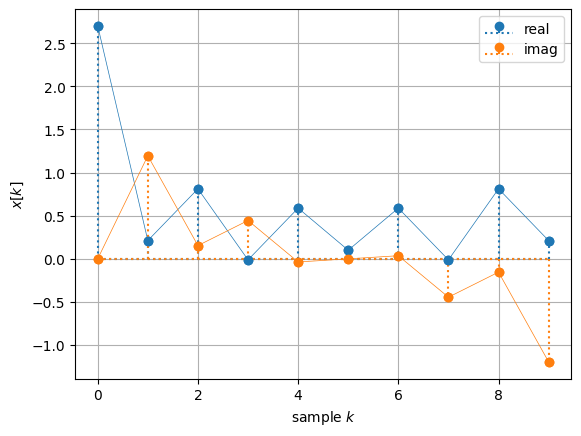

In [ ]:
# Input data from the beginning of this notebook
X_input = input_data

# Compute the Inverse Discrete Fourier Transform (IDFT) of the input data - equation (1)
x_idft = 1/N * np.matmul(W, X_input)

# Plot the real and imaginary parts of the IDFT result
plt.stem(k, np.real(x_idft), label='real', markerfmt='C0o', basefmt='C0:', linefmt='C0:')
plt.stem(k, np.imag(x_idft), label='imag', markerfmt='C1o', basefmt='C1:', linefmt='C1:')

#Plot lines between the markers to make it easier to read
plt.plot(k, np.real(x_idft), 'C0o-', lw=0.5)
plt.plot(k, np.imag(x_idft), 'C1o-', lw=0.5)

##Label the axes and add a legend
plt.xlabel(r'sample $k$')
plt.ylabel(r'$x[k]$')
plt.legend()
plt.grid(True)

#Check if results are identical with numpy ifft package
#The results should be identical
print(np.allclose(ifft(X_input), x_idft)) #This function will check if th two matrices are identical within a certain tolerance
print('DC is 1 as expected: ', np.mean(x_idft))